In [ ]:
!make install #Run command to install necessary modules
%conda install --channel conda-forge pygraphviz
!make format
!make lint # Run a linter in Flake8

In [ ]:
# Run the crawler
!make crawl

In [5]:
import json
with open('scrapy/output.json', 'r') as file:
    # Loads the JSON data from the file created from 'scrapy'
    companies_data = json.load(file)

companies_data

[{'Filing Type': 'Trade Name',
  'Status': 'Active',
  'Owner Name': 'DANDELION PAYMENTS, INC.',
  'Owner Address': '7000 VILLAGE DR\nSTE 200\nBUENA PARK, CA 90621-2287',
  'Nature of Business': 'Money transmission services',
  'Term of Duration': 'Expires - 5 years',
  'Initial Filing Date': '01/24/2019',
  'Expiration Date': '01/24/2029',
  'Principal Address': '7001 VILLAGE DR\nSTE 200\nBUENA PARK, CA 90621',
  'Mailing Address': '7000 VILLAGE DR\nSTE 200\nBUENA PARK, CA 90621',
  'Company': 'Xe USA'},
 {'Filing Type': 'Limited Liability Company - Business - Foreign',
  'Status': 'Active',
  'Standing - AR': 'Good',
  'Standing - RA': 'Good',
  'Standing - Other': 'Good',
  'Formed In': 'DELAWARE',
  'Term of Duration': 'Perpetual',
  'Initial Filing Date': '11/20/2020',
  'Principal Address': '14 HAMPSHIRE DRIVE\nHUDSON, NH 03051',
  'Mailing Address': '14 HAMPSHIRE DR\nHUDSON, NH 03051-4921',
  'AR Due Date': '11/15/2024',
  'Commercial Registered Agent': 'REGISTERED AGENT SOLUTIO

In [6]:
import networkx as nx
G = nx.Graph() # Person or Company that is an agent / owner

def create_graphs():
    """
    Creates the graphs, with two different types of nodes: company and person

    The edges are defined through defining relation between
    owner/agent and company
    """
    for data in companies_data:
        company_name = data["Company"]
        G.add_node(company_name, type="Company")
        if "Commercial Registered Agent" in data:
            cr_agent = data["Commercial Registered Agent"].split("\n")[0]
            G.add_node(cr_agent, type="Person")
            G.add_edges_from([(company_name, cr_agent),])
        if "Registered Agent" in data:
            r_agent = data["Registered Agent"].split("\n")[0]
            G.add_node(r_agent, type="Person")
            G.add_edges_from([(company_name, r_agent),])
        if "Owner Name" in data:
            owner = data["Owner Name"]
            G.add_node(owner, type="Person")
            G.add_edges_from([(company_name, owner),])
        elif "Owners" in data:
            owner_1 = data["Owners"].split("\n")[0]
            owner_2 = data[""].split("\n")[0]
            G.add_node(owner_1, type="Person")
            G.add_node(owner_2, type="Person")
            edges = [(owner_1, company_name), (owner_2, company_name),]
            G.add_edges_from(edges)

create_graphs()

In [7]:
# Set this to False if labels on graph are too distracting
graph_show_labels = True

/Users/icefreeze/miniconda3/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


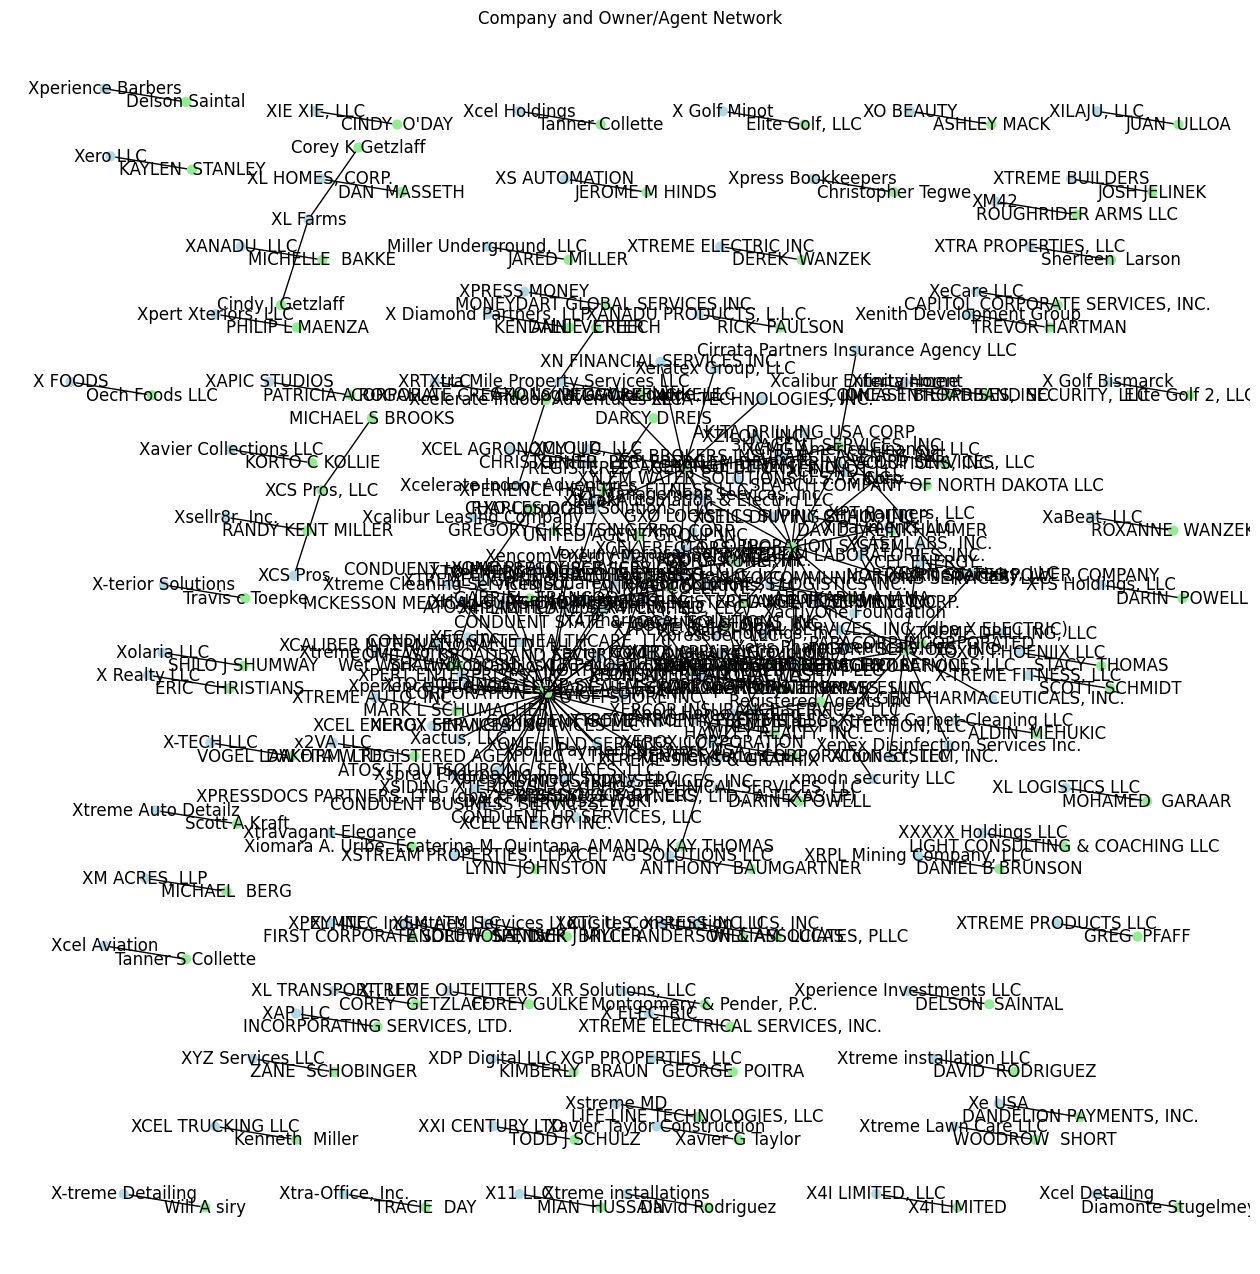

In [8]:
import matplotlib.pyplot as plt

def visualize_graph(type_colors):
    """
    Visualizes graphs representing relationship between owner/agent and companies
    """
    plt.figure(1, figsize=(16, 16))
    plt.title('Company and Owner/Agent Network')
    pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
    components = (G.subgraph(component) for component in nx.connected_components(G))
    for sub_graph in components:
        subgraph_colors = [type_colors[G.nodes[node]['type']] for node in sub_graph.nodes()]
        nx.draw(sub_graph, pos, node_size=40, node_color=subgraph_colors, vmin=0.0, vmax=1.0, with_labels=graph_show_labels)

colors = {'Company': 'lightblue', 'Person': 'lightgreen'}

visualize_graph(colors)

In [9]:
def print_connected_component_data():
    "Prints out connected component data"
    for component in nx.connected_components(G):
        print(G.subgraph(component).nodes(data=True))

print_connected_component_data()

[('DANDELION PAYMENTS, INC.', {'type': 'Person'}), ('Xe USA', {'type': 'Company'})]
[('Xeratex Group, LLC', {'type': 'Company'}), ('REGISTERED AGENT SOLUTIONS, INC.', {'type': 'Person'}), ('Xencom Energy Management, LLC', {'type': 'Company'}), ('RXO Corporate Solutions, LLC', {'type': 'Company'}), ('XPO Logistics Freight, Inc.', {'type': 'Company'}), ('XN FINANCIAL SERVICES INC.', {'type': 'Company'}), ('XCLOUD, LLC', {'type': 'Company'}), ('X S BROKERS INSURANCE AGENCY, INC.', {'type': 'Company'}), ('RXO Last Mile, Inc.', {'type': 'Company'}), ('GXO LOGISTICS SUPPLY CHAIN, INC.', {'type': 'Company'}), ('XETA TECHNOLOGIES, INC.', {'type': 'Company'}), ('GXO Logistics Worldwide, LLC', {'type': 'Company'})]
[('XConnect, LLC', {'type': 'Company'}), ('XTTRIUM LABORATORIES, INC.', {'type': 'Company'}), ('INCORP SERVICES, INC.', {'type': 'Person'}), ('XTREME DRILLING, LLC', {'type': 'Company'}), ('XTREME FIRE PROTECTION, LLC', {'type': 'Company'}), ('XCHANGE TELECOM LLC', {'type': 'Company'}